##### RQ2: Is FairST effective in mitigating bias, when compared to alternative state-of-the-art methods? 
This RQ compares FairST to existing methods by evaluating it on multiple classification tasks and ML algorithms, widely used in the literature. The performance is measured using a variety of common performance and bias metrics, with differing notions of fairness. This RQ also investigates the fairness-performance trade-off that FairST achieves.


##### RQ3: How effective is FairST when mitigating bias with multiple protected attributes?
In RQ2, the methods were evaluated with just a single protected attribute at a time to ease comparison with some of the baseline methods and datasets. This RQ compares the performance with a subset of baselines using metrics developed for measuring subgroup bias.

In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from experiment_utils import *
from src import *



# SAVE TO RESULTS FILE

In [37]:
FOLDER = "RQ2_BIAS_MIT"

if not os.path.exists(FOLDER):
    os.makedirs(FOLDER)

In [38]:
def f(df, reader): # Keep only K and KP
    df = df[(df["ML method"].str.contains('nn'))]
    df['TEMP'] = df['other'].apply(reader._get_losses_used)
    df = df[(~df["bias mitigation"].str.contains('FYP VAE')) | df["TEMP"].str.contains('Sensitive KL loss') ]
    df = df[~(df["TEMP"].str.contains("Flipped"))]
    df = df[~(df["TEMP"].str.contains("Latent"))]
    return df.drop(columns=['TEMP'])

### MEAN metric vals for NN 

In [39]:

for attr in [["sex"],["race"]]:            
    files = [os.path.join("results","RESULTS_"+'_'.join(attr)+".csv")]
    reader = ResultsReader(files)
        
    df = reader.get_mean_metrics()
    model_df = f(df, reader)
    mean_df = model_df.groupby(reader.filterable).mean().reset_index()
    mean_df.to_csv(os.path.join(FOLDER, "MEAN_"+'_'.join(attr)+'.csv'), index=False)



File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.


In [40]:
FOLDER = "RQ3_MULTIATTR"

if not os.path.exists(FOLDER):
    os.makedirs(FOLDER)

In [41]:
for attr in [["race", "sex"]]:            
    files =  [os.path.join("results","RESULTS_"+'_'.join(attr)+".csv")]
    reader = ResultsReader(files)
        
    df = reader.get_mean_metrics()
    
    model_df =f(df, reader)
    mean_df = model_df.groupby(reader.filterable).mean().reset_index()
    mean_df.to_csv(os.path.join(FOLDER, "MEAN_"+'_'.join(attr)+'.csv'), index=False)        


File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.


# VIS

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from experiment_utils import *
from src import *


pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [2]:
size = 3

In [3]:
def f(df, reader): # Keep only K and KP
    df = df[(df["ML method"].str.contains('nn'))]
    df['TEMP'] = df['other'].apply(reader._get_losses_used)
    df = df[~(df["TEMP"].str.contains("Pos"))]
    df = df[~(df["TEMP"].str.contains("Recon")) | df["TEMP"].str.contains('Sensitive KL loss') ]
    df = df[~(df["TEMP"].str.contains("Flipped"))]
    df = df[~(df["TEMP"].str.contains("Latent"))]
    return df.drop(columns=['TEMP'])

In [4]:
files, datasets, titles = get_all_single_attr_files()

File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['race|[SF] Statistical Pa

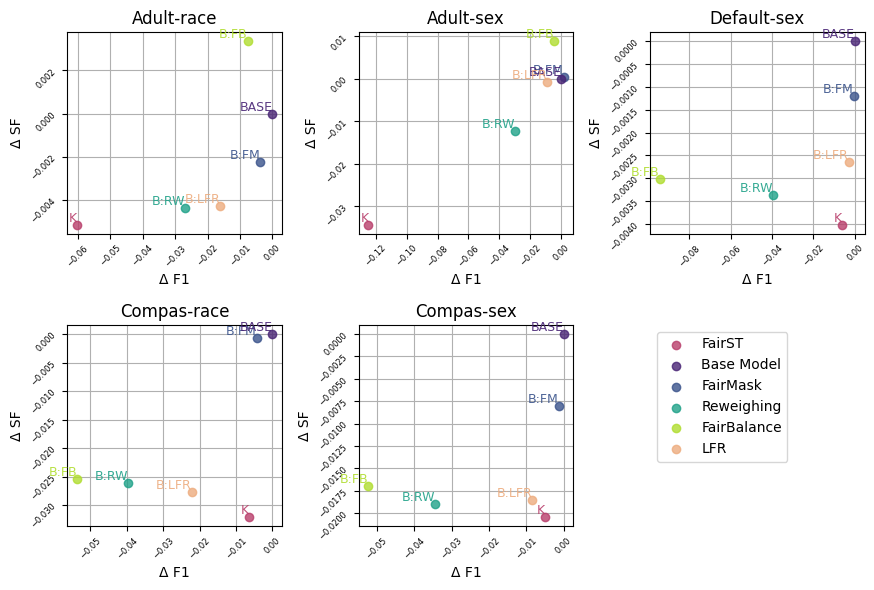

In [8]:
# NN
F, axes = plt.subplots(2, 3, figsize=(size*3, size*2 ))

locs = [(0,2),(0,0),(0,1),(1,0),(1,1)]
labels  = ['FairST','BASE',"B:FM","B:RW","B:FB","B:LFR"]


for i in range(5):
    y,x = locs[i]
    plot_one_run(f, files[i], datasets[i], axes[y][x])
    axes[y][x].set_title(titles[i])
    axes[y][x].set_ylabel("Δ SF") # comment out to make sure 
    axes[y][x].set_xlabel("Δ F1")
    
plt.tight_layout() 
add_legend(axes[1][2], labels)
axes[1][2].axis('off')
plt.rc('axes', axisbelow=True)
plt.savefig('imgs/RQ2_singleattr_F1_SF.png')
plt.show()

In [6]:
multi_files, multi_datasets, multi_titles = get_all_multi_attr_files()

File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', 'sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', 'sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
['FairST', 'BASE', 'B:FM', 'B:RW', 'B:FB']


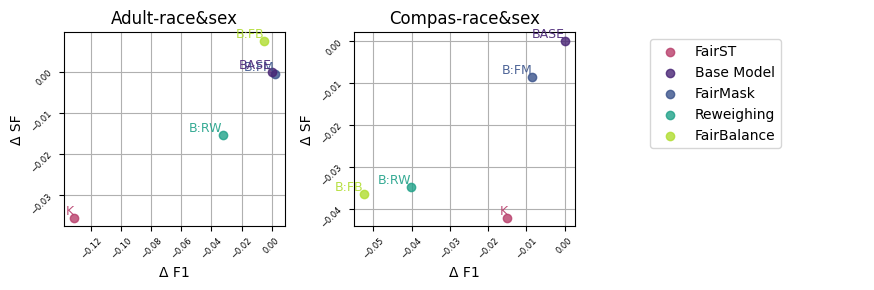

In [7]:
F, axes = plt.subplots(1, 3, figsize=(size*(3), size))
labels  = ['FairST','BASE',"B:FM","B:RW","B:FB"]

for i in range(2):
    plot_one_run(f, multi_files[i], multi_datasets[i], axes[i])
    axes[i].set_title(multi_titles[i])
    axes[i].set_ylabel("Δ SF") # comment out to make sure 
    axes[i].set_xlabel("Δ F1")
    
    
plt.tight_layout() 
add_legend(axes[2], labels)
axes[2].axis('off')
plt.rc('axes', axisbelow=True)
plt.savefig('imgs/RQ3_multiattr_F1_SF.png')


plt.show()

File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['sex|[SF] Statistical Pa

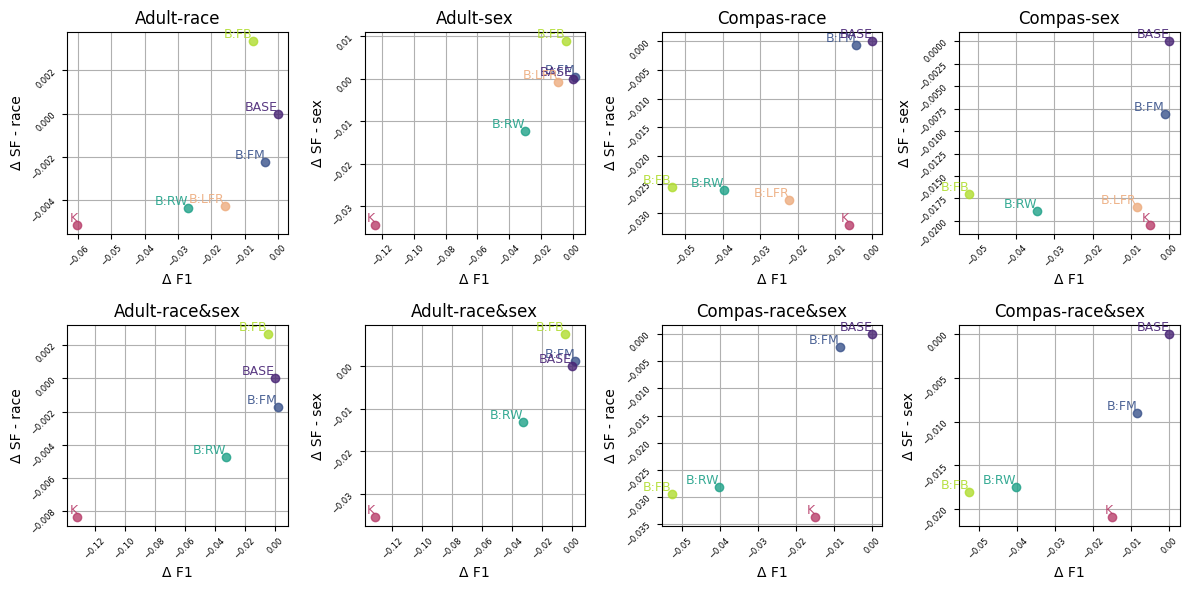

In [12]:
F, axes = plt.subplots(2, 4, figsize=(size*(4), size*2))

attrs = ["race", "sex","race", "sex"]
for i in range(1,5):
    plot_one_run(f, files[i], datasets[i], axes[0][i-1], "[SF]")
    axes[0][i-1].set_title(titles[i])
    axes[0][i-1].set_ylabel("Δ SF - "+attrs[i-1]) # comment out to make sure 
    axes[0][i-1].set_xlabel("Δ F1")
    



for i in range(2):
    plot_one_run(f, multi_files[i], multi_datasets[i], axes[1][i*2], y_metric="race|[SF]")
    axes[1][i*2].set_title(multi_titles[i])
    axes[1][i*2].set_ylabel("Δ SF - race") # comment out to make sure 
    axes[1][i*2].set_xlabel("Δ F1")
    
    
for i in range(2):
    plot_one_run(f, multi_files[i], multi_datasets[i], axes[1][i*2+1], y_metric="sex|[SF]")
    axes[1][i*2+1].set_title(multi_titles[i])
    axes[1][i*2+1].set_ylabel("Δ SF - sex") # comment out to make sure 
    axes[1][i*2+1].set_xlabel("Δ F1")
    
    
plt.rc('axes', axisbelow=True)
plt.tight_layout()
plt.savefig('imgs/RQ3_multiattr_DF.png')

plt.show()

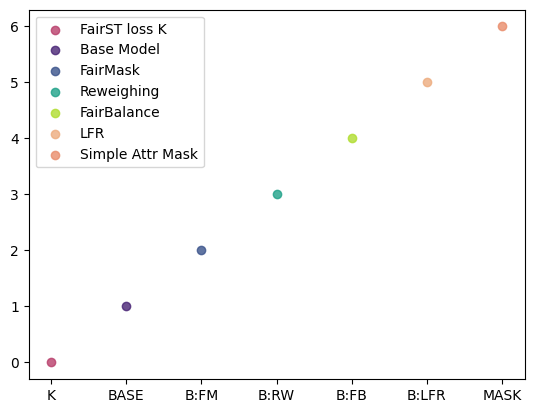

In [23]:
# LEGEND!
grapher = ResultsGrapher(None)
labels  = ["K",'BASE',"B:FM","B:RW","B:FB","B:LFR","MASK"]
x = list(range(len(labels)))
cols = [grapher.get_color(l) for l in labels]
handles = [grapher._get_legend_text(l,l) for l in labels]

for i, l in enumerate(labels):
    plt.scatter(
            l,
            i,
            label=grapher._get_legend_text(l, l),
            color=grapher.get_color(l),
            alpha=0.8,
        )
legend = plt.legend()
#plt.show()

# CHECK OUT ALL COMBOS

File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
metrics to display: [DF] Differential Fairness f1score  | all found  ['[DF] Differential Fairness'] ['f1score']
metrics to display: sex|[DI_FM] Disparate Impact the way it was implemented in FairMask f1score  | all found  ['sex|[DI] Disparate Impact', 'sex|[DI_FM] Disparate Impact the way it was implemented in FairMask'] ['f1score']
metrics to display: sex|[ERD] Error Rate Difference f1score  | all found  ['sex|[ERD] Error Rate Difference'] ['f1score']
metrics to display: [SF] Statistical Parity Subgroup Fairness MCC  | all found  ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['MCC']
metrics to display: [DF] Differential Fairness MCC  | all found  ['[

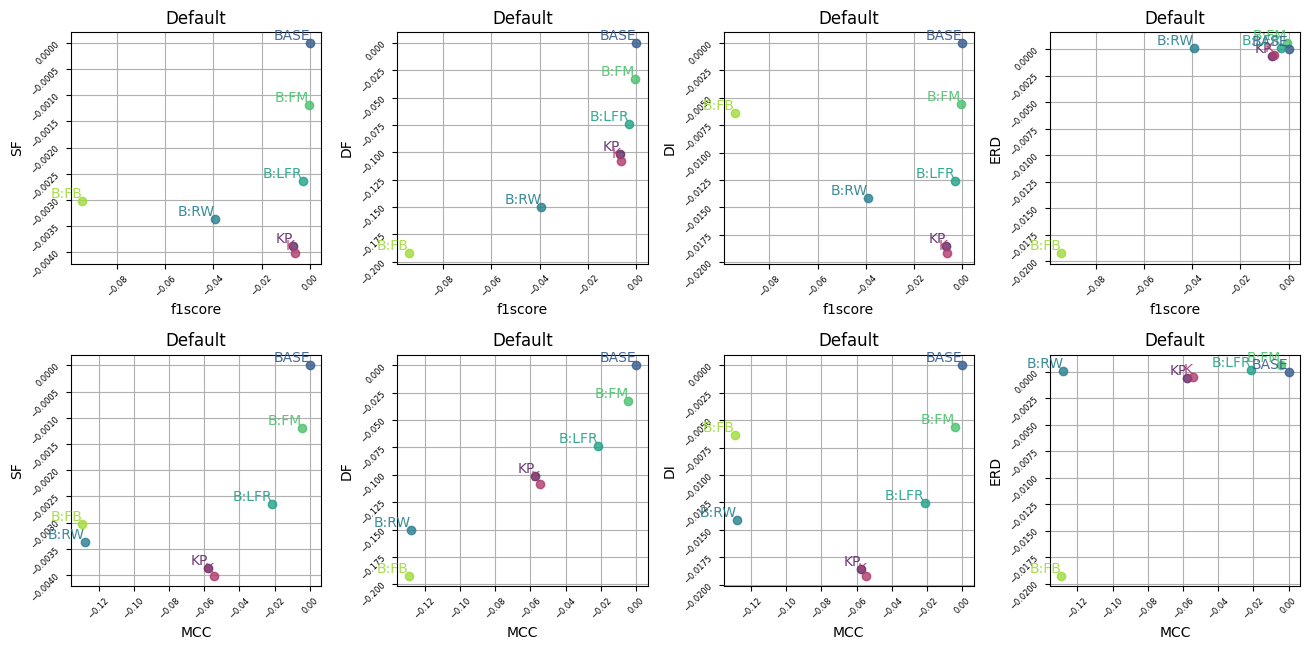

File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
metrics to display: [DF] Differential Fairness f1score  | all found  ['[DF] Differential Fairness'] ['f1score']
metrics to display: race|[DI_FM] Disparate Impact the way it was implemented in FairMask f1score  | all found  ['race|[DI] Disparate Impact', 'race|[DI_FM] Disparate Impact the way it was implemented in FairMask'] ['f1score']
metrics to display: race|[ERD] Error Rate Difference f1score  | all found  ['race|[ERD] Error Rate Difference'] ['f1score']
metrics to display: [SF] Statistical Parity Subgroup Fairness MCC  | all found  ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['MCC']
metrics to display: [DF] Differential Fairness MCC  | all fo

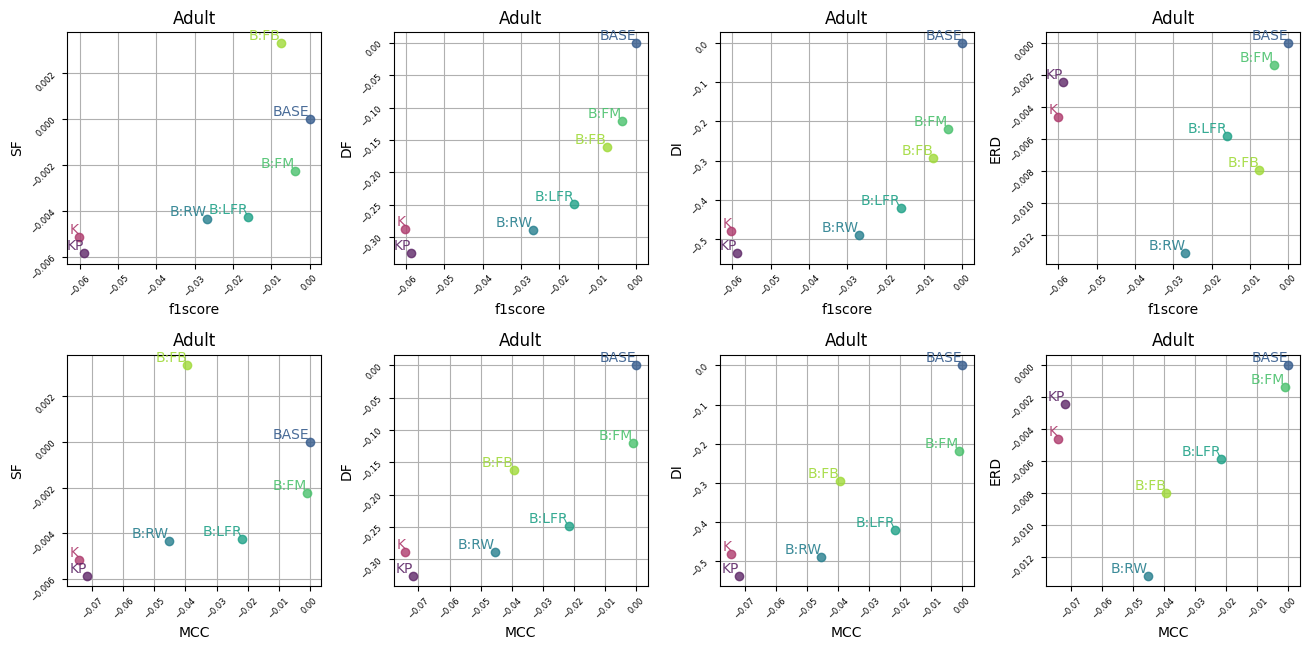

File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
metrics to display: [DF] Differential Fairness f1score  | all found  ['[DF] Differential Fairness'] ['f1score']
metrics to display: sex|[DI_FM] Disparate Impact the way it was implemented in FairMask f1score  | all found  ['sex|[DI] Disparate Impact', 'sex|[DI_FM] Disparate Impact the way it was implemented in FairMask'] ['f1score']
metrics to display: sex|[ERD] Error Rate Difference f1score  | all found  ['sex|[ERD] Error Rate Difference'] ['f1score']
metrics to display: [SF] Statistical Parity Subgroup Fairness MCC  | all found  ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['MCC']
metrics to display: [DF] Differential Fairness MCC  | all found  ['[

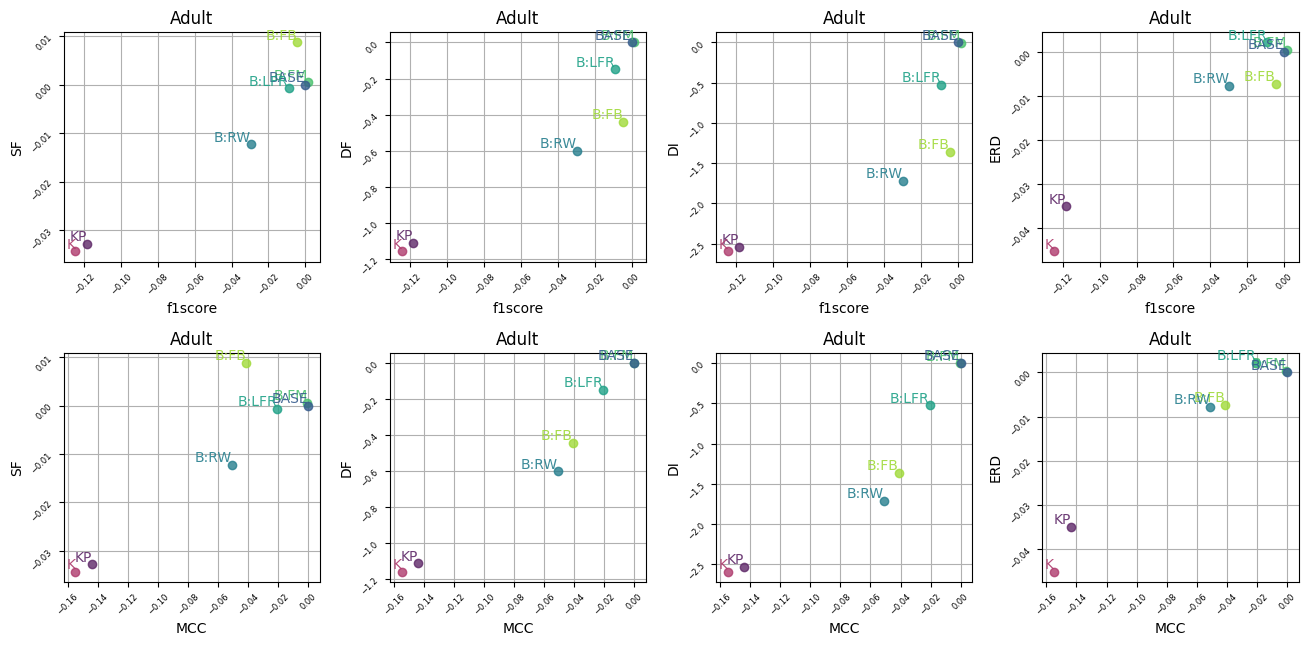

File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
metrics to display: [DF] Differential Fairness f1score  | all found  ['[DF] Differential Fairness'] ['f1score']
metrics to display: race|[DI_FM] Disparate Impact the way it was implemented in FairMask f1score  | all found  ['race|[DI] Disparate Impact', 'race|[DI_FM] Disparate Impact the way it was implemented in FairMask'] ['f1score']
metrics to display: race|[ERD] Error Rate Difference f1score  | all found  ['race|[ERD] Error Rate Difference'] ['f1score']
metrics to display: [SF] Statistical Parity Subgroup Fairness MCC  | all found  ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['MCC']
metrics to display: [DF] Differential Fairness MCC  | all fo

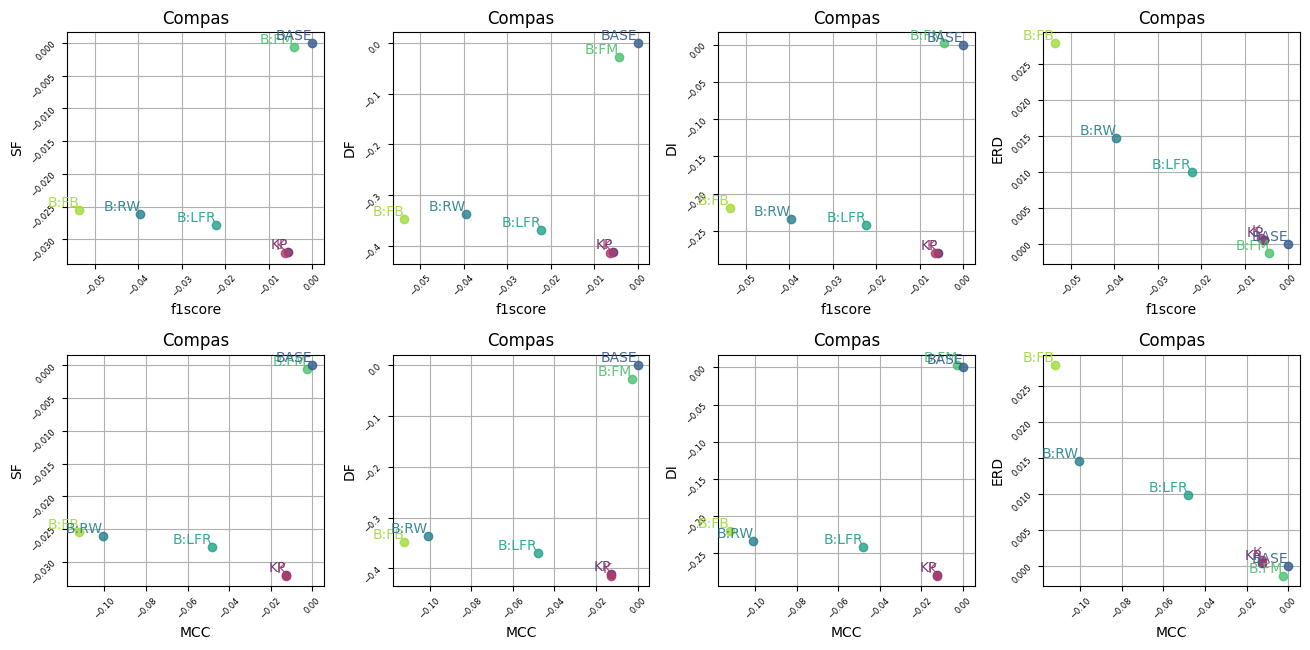

File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
metrics to display: [DF] Differential Fairness f1score  | all found  ['[DF] Differential Fairness'] ['f1score']
metrics to display: sex|[DI_FM] Disparate Impact the way it was implemented in FairMask f1score  | all found  ['sex|[DI] Disparate Impact', 'sex|[DI_FM] Disparate Impact the way it was implemented in FairMask'] ['f1score']
metrics to display: sex|[ERD] Error Rate Difference f1score  | all found  ['sex|[ERD] Error Rate Difference'] ['f1score']
metrics to display: [SF] Statistical Parity Subgroup Fairness MCC  | all found  ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['MCC']
metrics to display: [DF] Differential Fairness MCC  | all found  ['[

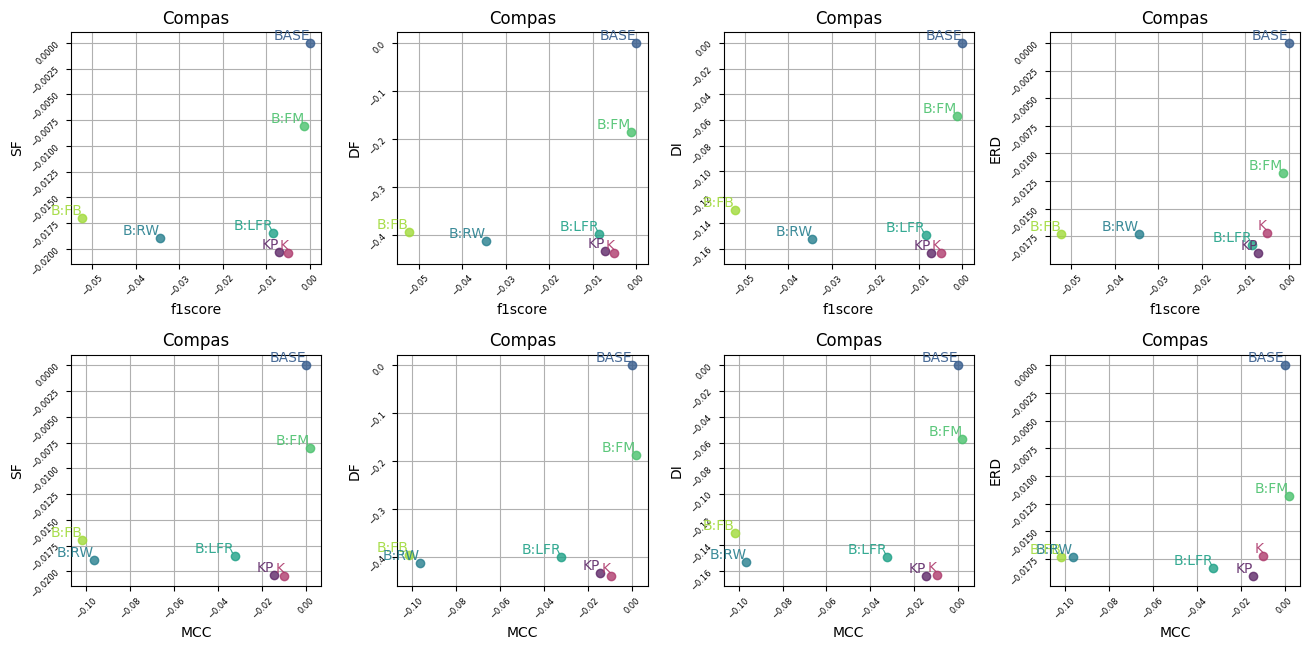

In [52]:
metrics_to_use = ["SF", "DF", "DI", "ERD"] 

for i in range(5):
    plot_multiple_metrics(f, files[i], datasets[i], metrics_to_use=metrics_to_use, size=size)


File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', 'sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
metrics to display: [DF] Differential Fairness f1score  | all found  ['[DF] Differential Fairness'] ['f1score']
metrics to display: [SF] Statistical Parity Subgroup Fairness MCC  | all found  ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', 'sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['MCC']
metrics to display: [DF] Differential Fairness MCC  | all found  ['[DF] Differential Fairness'] ['MCC']


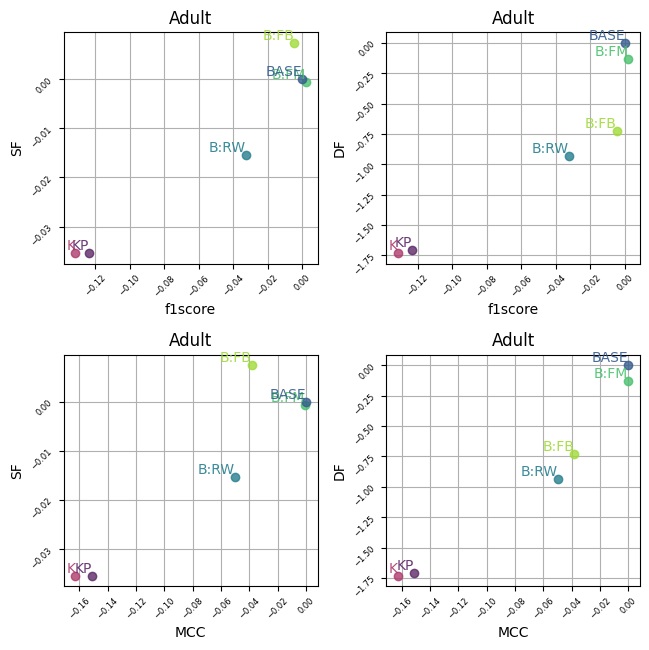

File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', 'sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
metrics to display: [DF] Differential Fairness f1score  | all found  ['[DF] Differential Fairness'] ['f1score']
metrics to display: [SF] Statistical Parity Subgroup Fairness MCC  | all found  ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', 'sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['MCC']
metrics to display: [DF] Differential Fairness MCC  | all found  ['[DF] Differential Fairness'] ['MCC']


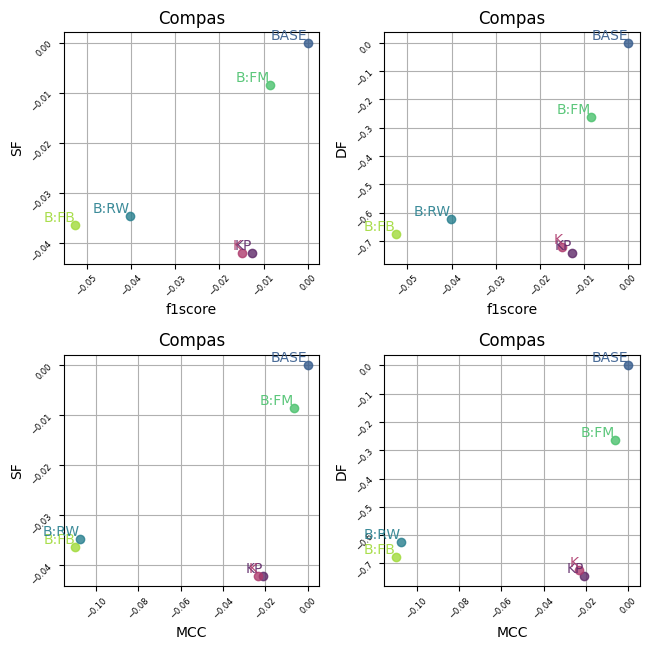

In [53]:
metrics_to_use = ["SF", "DF"] 

for i in range(2):
    plot_multiple_metrics(f, multi_files[i], multi_datasets[i], metrics_to_use=metrics_to_use, size=size)
    axes[i].set_title(multi_titles)
        